In [1]:
import matplotlib.pyplot as plt
import mplhep
import numpy as np
import pandas as pd
import scipy.optimize as sc
import scipy

In [2]:
file_Hg_cal = 'Mono/Hg_spectrum_3.dig'
file_background = 'Mono/background_spectrum_1.dig'

Hg_cal = pd.read_csv(file_Hg_cal, skiprows=1, skipfooter=0, sep='\t', names=['Channel', 'Counts'], decimal=',')
back = pd.read_csv(file_background, skiprows=1, skipfooter=0, sep='\t', names=['Channel', 'Counts'], decimal=',')

In [3]:
def lorentz(x, A, w0, gamma):
    '''Function of a Lorentz-curve.

    w0 : position of maximum
    gamma : curve width
    '''
    return A/((x**2 - w0**2)**2 + gamma**2 * w0**2)


def voigt(x, mean, sigma, gamma, A, c):
    return A * scipy.special.voigt_profile(x-mean, sigma, gamma) + c

def gauss(x, A, mu, sigma, C):
    return A * np.exp(-(x-mu)**2 / (2*sigma)) + C

def linear(x, a, b):
    return a * x + b

[ 9.31581896e+04  4.04209388e+03  2.35979723e+00 -8.43357446e+02] [2.00696305e+03 3.43548039e-02 1.37526436e-01 1.23693940e+03]
[ 1.76611557e+04  4.07345690e+03  2.17644345e+00 -1.71913496e+02] [2.82787073e+02 2.30517160e-02 9.93334964e-02 2.10840272e+02]
[ 1.51919170e+05  4.35412604e+03  2.92441923e+00 -4.13931322e+03] [6.01529093e+03 6.40894983e-02 3.25890519e-01 4.65761287e+03]
[ 7.85732628e+04  5.45718298e+03  2.23715846e+00 -1.27602331e+03] [2.09099406e+03 3.85198272e-02 1.69910949e-01 1.58289319e+03]
[6.50700275e+03 5.76604933e+03 2.19934482e+00 7.15147228e+01] [1.25599590e+02 3.05370137e-02 1.11313054e-01 6.78388256e+01]
[6.24166450e+03 5.78748813e+03 2.27253144e+00 9.10074177e+01] [9.96251197e+01 2.55899071e-02 9.55733833e-02 5.48256469e+01]


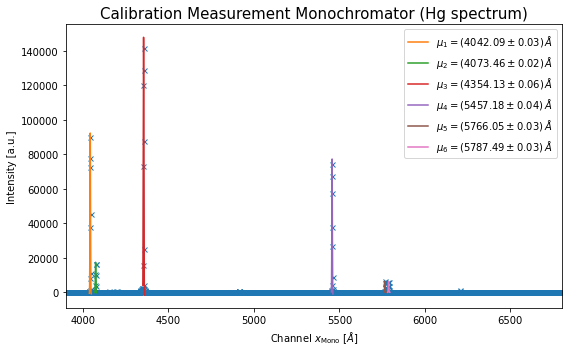

In [4]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(Hg_cal['Channel'][1:], Hg_cal['Counts'][1:], marker = 'x', lw=0.5, ms = 5)

a = [[135, 146], [168, 177], [449, 459], [1552, 1561], [1860, 1872], [1880, 1892]]
p0s = [[100000, 4040, 2, 20], [20000, 4075, 2, 20], [140000, 4354, 2, 0], [80000, 5456, 2, 20], [6000, 5765, 2, 20], [6000, 5790, 2, 20]]
xaxis = [np.linspace(4037, 4048, 1001), np.linspace(4069, 4079, 1001), np.linspace(4350, 4359, 1001), np.linspace(5453, 5462, 1001),
        np.linspace(5760, 5774, 1001), np.linspace(5782, 5795, 1001)]
colors = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6']
coefficients = np.zeros((6, 4))
covariance = np.zeros((6, 4, 4))

for i in range(6):
    params, cov = sc.curve_fit(gauss, Hg_cal['Channel'][a[i][0]:a[i][1]+1], Hg_cal['Counts'][a[i][0]:a[i][1]+1],
                              p0 = p0s[i])
    coefficients[i] = params
    covariance[i] = cov
    print(params, np.sqrt(np.diag(cov)))
    # ax.axvline(Hg_cal['Channel'][a[i][0]], color=colors[i], ls='--', lw=1)
    # ax.axvline(Hg_cal['Channel'][a[i][1]], color=colors[i], ls='--', lw=1)
    ax.plot(xaxis[i], gauss(xaxis[i], *params), color=colors[i], label = r'$\mu_{} = ({:.2f} \pm {:.2f})\,\AA$'.format(i+1, params[1], np.sqrt(cov[1,1])))
# ax.set_xlim([4000, 4100])
# ax.set_xlim([4200, 4500])
# ax.set_xlim([4340, 4390])
# ax.set_xlim([5440, 5480])
# ax.set_xlim([5700, 5900])
ax.set_xlim([3900, 6800])
# ax.set_ylim([0, 10000])
ax.set_xlabel(r'Channel $x_\mathrm{Mono}$ [$\AA$]')
ax.set_ylabel(r'Intensity [a.u.]')
ax.set_title(r'Calibration Measurement Monochromator (Hg spectrum)', size=15)
ax.legend()
plt.tight_layout()
# plt.savefig(r'Figures/Mono_Calibration.pdf', dpi=600)
plt.show()

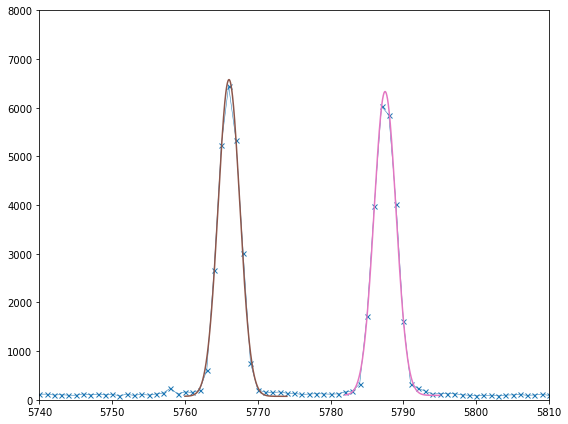

In [5]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(Hg_cal['Channel'][1:], Hg_cal['Counts'][1:], marker = 'x', lw=0.5, ms = 5)
i=4
ax.plot(xaxis[i], gauss(xaxis[i], *coefficients[i]), color=colors[i], label = r'$\mu_{} = ({:.2f} \pm {:.2f})\,$nm'.format(i+1, params[1], np.sqrt(cov[1,1])))
i=5
ax.plot(xaxis[i], gauss(xaxis[i], *coefficients[i]), color=colors[i], label = r'$\mu_{} = ({:.2f} \pm {:.2f})\,$nm'.format(i+1, params[1], np.sqrt(cov[1,1])))
ax.set_xlim(5740, 5810)
ax.set_ylim((0,8000))
plt.tight_layout()
# plt.savefig(r'Figures/Mono_Calibration_Zoom.pdf', dpi=600)
plt.show()

[0.09993907 0.6888842 ] [7.02611054e-06 3.49443085e-02]


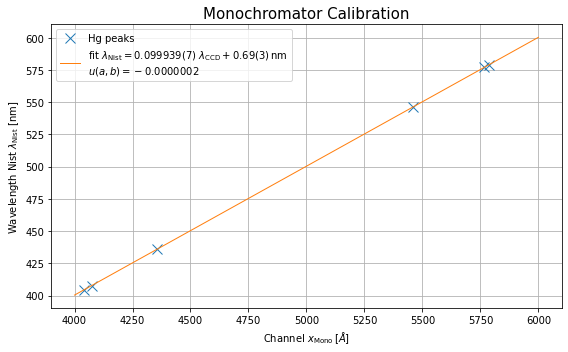

In [6]:
Hg_Nist = [404.6565, 407.7837, 435.8335, 546.075, 576.961, 579.067]
params_linear, cov_linear = sc.curve_fit(linear, coefficients[:,1], Hg_Nist)
print(params_linear, np.sqrt(np.diagonal(cov_linear)))
channels = np.linspace(4000, 6000, 1001)
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(coefficients[:,1], Hg_Nist, marker = 'x', lw = 0, ms=10, label = r'Hg peaks')
ax.plot(channels, linear(channels, *params_linear), marker = None, lw=1,
        label = r'fit $\lambda_\mathrm{{Nist}} = {:.6f}(7)~\lambda_\mathrm{{CCD}} + {:.2f}(3)\,$nm'.format(
            params_linear[0], params_linear[1]) + '\n' + r'$u(a,b) = {:.7f}$'.format(cov_linear[0,1]))
ax.set_xlabel(r'Channel $x_\mathrm{Mono}\,[\AA]$')
ax.set_ylabel(r'Wavelength Nist $\lambda_\mathrm{Nist}$ [nm]')
ax.set_title(r'Monochromator Calibration', size=15)
ax.grid()
ax.legend()
plt.tight_layout()
# plt.savefig('Figures/Calibration_line_Mono.pdf', dpi=800)
plt.show()

In [7]:
out = pd.DataFrame({'params_linear':params_linear,
                    'cov_linear': np.sqrt(np.diagonal(cov_linear))})

out.to_csv('Mono_params.csv', index=False)

In [8]:
Hg_Nist = [404.6565, 407.7837, 435.8335, 546.075, 576.961, 579.067]

for i in range(6):
    print('Fit:', coefficients[i,1]/10, r'+-', np.sqrt(covariance[i,1,1])/10)
    print('Nist', Hg_Nist[i])
print('\n Our Monochromator is slightly (approx 0.3nm) shifted down.')

Fit: 404.2093875618676 +- 0.0034354803901458777
Nist 404.6565
Fit: 407.34568984673336 +- 0.002305171595868279
Nist 407.7837
Fit: 435.4126042160219 +- 0.006408949829786861
Nist 435.8335
Fit: 545.7182975521238 +- 0.0038519827245557673
Nist 546.075
Fit: 576.604932701199 +- 0.0030537013681551056
Nist 576.961
Fit: 578.7488133701605 +- 0.002558990714944766
Nist 579.067

 Our Monochromator is slightly (approx 0.3nm) shifted down.


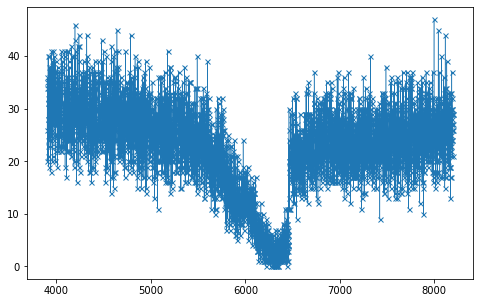

In [9]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(back['Channel'], back['Counts'], marker = 'x', lw=0.5, ms = 5)

In [10]:
file_white_spectrum = 'Mono/white_light_spectrum_1.dig'

white_1 = pd.read_csv(file_white_spectrum, skiprows=1, skipfooter=0, sep='\t', names=['Channel', 'Counts'], decimal=',')

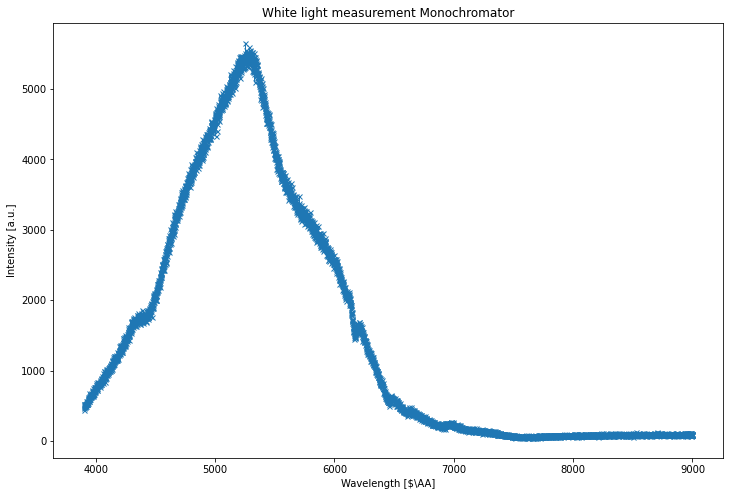

In [11]:
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(white_1['Channel'], white_1['Counts'], marker = 'x', lw=0.5, ms = 5)

ax.set_xlabel(r'Wavelength [$\AA]')
ax.set_ylabel(r'Intensity [a.u.]')
ax.set_title(r'White light measurement Monochromator')
plt.show()

In [12]:
file_1 = 'Mono/white_light_0degree.dig'
file_2 = 'Mono/white_light_90degree.dig'
df0 = pd.read_csv(file_1, skiprows=1, skipfooter=0, sep='\t', names=['Channel', 'Counts'], decimal=',')
df90 = pd.read_csv(file_2, skiprows=1, skipfooter=0, sep='\t', names=['Channel', 'Counts'], decimal=',')

[-3.40076010e-04  2.78766645e+00] [2.48980873e-06 1.37115540e-02] [-0.00732133  0.00491865]


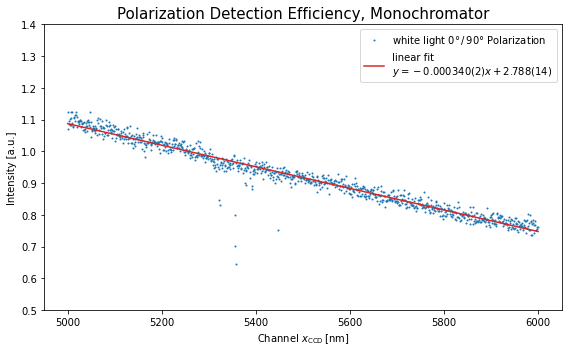

In [62]:
x0, y0 = df0['Channel'][1099:2099], df0['Counts'][1099:2099]
x90, y90 = df90['Channel'][1099:2099], df90['Counts'][1099:2099]

lin_par, lin_cov = np.polyfit(x0, y0/y90, 1, rcond=None, full=False, w=None, cov=True)

print(lin_par, np.sqrt(np.diagonal(lin_cov)), np.sqrt(np.diagonal(lin_cov)) / lin_par)

xaxis = np.linspace(5000, 6000, 1001)

fig, ax = plt.subplots(figsize = (8,5))
# ax.plot(x0, y0, marker = 'x', lw=0.5, ms = 2, label = r'white light $0\degree$ Polarization filter', color = 'C0')
# ax.plot(x0, y0, marker = 'x', lw=0.5, ms = 2, label= r'white light $90\degree$ Polarization filter', color = 'C1')
ax.plot(x0, y0/y90, marker = '.', lw=0, ms = 2,
        label= r'white light $0\degree\,/\,90\degree$ Polarization', color = 'C0')
ax.plot(xaxis, np.polyval(lin_par, xaxis), color = 'C3', label ='linear fit \n' + r'$y={:.6f}(2) x + {:.3f}(14)$'.format(*lin_par))
ax.set_xlabel(r'Channel $x_\mathrm{CCD}\,$[nm]')
ax.set_ylabel(r'Intensity [a.u.]')
ax.set_title(r'Polarization Detection Efficiency, Monochromator', size=15)
ax.set_ylim(0, 3)
# ax.set_xlim(5000, 6000)
ax.set_ylim(0.5, 1.4)
ax.legend()
plt.tight_layout()
# plt.savefig('Figures/Notchfilter.pdf', dpi=800)
plt.show()